In [1]:
#input strings

a = 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'
b = 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'
c = 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA'
d = 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA'
e = 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA'
f = 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG'
g = 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA'

In [133]:
# Function to return all LCS of substrings `X[0…m-1]`, `Y[0…n-1]`
def LCS(X, Y, m, n, lookup):

    """
    This function takes in two strings X and Y and their lengths m and n respectively. 
    It uses dynamic programming to construct a 2D list lookup which stores the lengths of the 
    Longest Common Subsequence between substrings of X and Y. The function then uses the lookup 
    table and the LCS function to find and return a list of all possible Longest Common 
    Subsequences between X and Y.



    param X: string representing the first input sequence
    param Y: string representing the second input sequence
    param m: length of string X
    param n: length of string Y
    param lookup: 2D list to store the intermediate results of the LCS calculation


    return: two lists

    """
 
    # if the end of either sequence is reached
    if m == 0 or n == 0:
        # create a list with one empty string and return
        return ['']
 
    # if the last character of `X` and `Y` matches
    if X[m - 1] == Y[n - 1]:
 
        # ignore the last characters of `X` and `Y` and find all LCS of substring
        # `X[0…m-2]`, `Y[0…n-2]` and store it in a list
        lcs = LCS(X, Y, m - 1, n - 1, lookup)
 
        # append current character `X[m-1]` or `Y[n-1]`
        # to all LCS of substring `X[0…m-2]` and `Y[0…n-2]`
        for i in range(len(lcs)):
            lcs[i] = lcs[i] + (X[m - 1])
 
        return lcs
 
    # we reach here when the last character of `X` and `Y` don't match
 
    # if a top cell of the current cell has more value than the left cell,
    # then ignore the current character of string `X` and find all LCS of
    # substring `X[0…m-2]`, `Y[0…n-1]`
    if lookup[m - 1][n] > lookup[m][n - 1]:
        return LCS(X, Y, m - 1, n, lookup)
 
    # if a left cell of the current cell has more value than the top cell,
    # then ignore the current character of string `Y` and find all LCS of
    # substring `X[0…m-1]`, `Y[0…n-2]`
    if lookup[m][n - 1] > lookup[m - 1][n]:
        return LCS(X, Y, m, n - 1, lookup)
 
    # if the top cell has equal value to the left cell, then consider both characters
 
    top = LCS(X, Y, m - 1, n, lookup)
    left = LCS(X, Y, m, n - 1, lookup)
 
    # merge two lists and return
    return top + left
 

#Function to fill the lookup table by finding the length of LCS
# of substring `X` and `Y`
def LCSLength(X, Y, lookup):

    """
    This function calculates the length of the longest common subsequence (LCS) of two 
    strings, X and Y, using a bottom-up dynamic programming approach.

    param X: string representing the first input sequence
    param Y: string representing the second input sequence
    param lookup: 2D list to store the intermediate results of the LCS calculation
    """
 
    # fill the lookup table in a bottom-up manner
    for i in range(1, len(X) + 1):
        for j in range(1, len(Y) + 1):
            # if current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
 
            # otherwise, if the current character of `X` and `Y` don't match
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])
 
 
# Function to find all LCS of string `X[0…m-1]` and `Y[0…n-1]`
def findLCS(X, Y):

    """
    Finds all longest common subsequences of strings `X` and `Y`.

    This function uses a dynamic programming approach to find the longest common subsequences
    of the given strings `X` and `Y`. It returns a tuple `(lcs, length)` where `lcs` is a list
    of all longest common subsequences and `length` is the length of these subsequences.

    param X: a string
    param Y: a string
    return: a tuple `(lcs, length)` where `lcs` is a list of all longest 
    common subsequences and `length` is their length
    rtype: tuple
    """
 
    # lookup[i][j] stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(len(Y) + 1)] for y in range(len(X) + 1)]
 
    # fill lookup table
    LCSLength(X, Y, lookup)
 
    # find all the longest common subsequences
    lcs = LCS(X, Y, len(X), len(Y), lookup)

    Lcs = set(lcs)

    LST = list(Lcs)
    answer = (LST, len(LST[0]))

    # since a list can contain duplicates, "convert" it to a set and return
    return answer



lcs = findLCS(a, b)
print(lcs)


(['CAGCAGCCATCCTGAGAACGAAATACGCGACCGTCAGGGGCTGCTCCGAGGATACCTGACGTGTTGGGA'], 69)


In [8]:
#test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
assert findLCS(x1, y1) == (['BCAB', 'BDAB', 'BCBA'], 4)
assert findLCS(x2, y2) == ([''], 0)
assert findLCS(x3, y3) == (['a'], 1)
assert findLCS(x4, y4) == (['ac'], 2)

In [9]:
#matrix of the lengths of LCSs


import pandas as pd
import numpy as np


def matrix_builder(Set_Strings,len_lcs_matrix):
    # Iterate over each pair of strings in Set_Strings
    for i in range(7):
        for j in range(7):
            # Get the ith and jth strings from Set_Strings
            string1 = Set_Strings[i]
            string2 = Set_Strings[j]
            
            # Initialize the lengths of the strings
            n = len(string1)
            m = len(string2)
            
            # Create a two-dimensional array of size (n+1) x (m+1) to store the lengths of the LCSs
            lcs_matrix = np.zeros((n+1, m+1))
            
            # Iterate over the characters in string1 and string2
            for x in range(1, n+1):
                for y in range(1, m+1):
                    # If the characters match, add 1 to the length of the LCS
                    if string1[x-1] == string2[y-1]:
                        lcs_matrix[x,y] = lcs_matrix[x-1,y-1] + 1
                    # If the characters don't match, take the maximum of the previous values
                    else:
                        lcs_matrix[x,y] = max(lcs_matrix[x-1,y], lcs_matrix[x,y-1])
            # Store the length of the LCS for this pair of strings in len_lcs_matrix
            len_lcs_matrix[i,j] = lcs_matrix[n,m]


    #identifying columns and rows for formatting
    column_names = ['a', 'b', 'c','d', 'e', 'f', 'g']
    row_names    = ['a', 'b', 'c','d', 'e', 'f', 'g']
    matrix = pd.DataFrame(len_lcs_matrix, columns=column_names, index=row_names)


    print("LCSs lengths matrix ")
    print(matrix.astype(int))


# Set_Strings contains the strings to be compared
Set_Strings = [a ,b, c, d, e, f, g]

# len_lcs_matrix will store the lengths of the LCSs for each pair of strings
len_lcs_matrix = np.zeros((7, 7))


matrix_builder(Set_Strings,len_lcs_matrix)

LCSs lengths matrix 
    a   b   c   d   e   f   g
a  80  69  62  73  67  66  70
b  69  88  62  76  62  61  72
c  62  62  85  61  75  72  61
d  73  76  61  84  62  63  79
e  67  62  75  62  81  76  63
f  66  61  72  63  76  87  65
g  70  72  61  79  63  65  91


In [10]:
#percentage of lcs length relative to the row sequence length

lcs_percentages = []

sequences_lengths = [len(n) for n in Set_Strings]


#looping through the LCSs 
for i in range(0,7):
    fraction_row = []
    for j in range(0,7):
        #getting the fraction of LCS to the length of the row string
        fraction_row.append(round(len_lcs_matrix[i,j]/sequences_lengths[i], 2))
    lcs_percentages.append(fraction_row)
len_lcs_matrix_fract = np.array(lcs_percentages)

#identifying columns and rows for formatting
column_names = ['a', 'b', 'c','d', 'e', 'f', 'g']
row_names    = ['a', 'b', 'c','d', 'e', 'f', 'g']
fract_matrix = pd.DataFrame(len_lcs_matrix_fract, columns=column_names, index=row_names)
print("percentage of lcs length relative to the row sequence length")
print(fract_matrix)

percentage of lcs length relative to the row sequence length
      a     b     c     d     e     f     g
a  1.00  0.86  0.78  0.91  0.84  0.82  0.88
b  0.78  1.00  0.70  0.86  0.70  0.69  0.82
c  0.73  0.73  1.00  0.72  0.88  0.85  0.72
d  0.87  0.90  0.73  1.00  0.74  0.75  0.94
e  0.83  0.77  0.93  0.77  1.00  0.94  0.78
f  0.76  0.70  0.83  0.72  0.87  1.00  0.75
g  0.77  0.79  0.67  0.87  0.69  0.71  1.00


In [11]:
# A Dynamic Programming based Python program for edit
# distance problem


def editDistDP(str1, str2, m, n):


    """
    This function calculates the edit distance between two given strings using the 
    dynamic programming approach.The edit distance is the minimum number of operations 
    (insertions, deletions, and mutations) required to transform one string into the other.
    
    Parameters:
    str1 (str): The first input string
    str2 (str): The second input string
    m (int): The length of str1
    n (int): The length of str2

    Returns:
    int: The minimum number of operations required to transform str1 into str2.

    """



    # Create a table to store results of subproblems
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)]

    # Fill d[][] in bottom up manner
    for i in range(m + 1):
        for j in range(n + 1):

            # If first string is empty, only option is to
            # insert all characters of second string
            if i == 0:
                dp[i][j] = j # Min. operations = j

            # If second string is empty, only option is to
            # remove all characters of second string
            elif j == 0:
                dp[i][j] = i # Min. operations = i

            # If last characters are same, ignore last char
            # and recur for remaining string
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]

            # If last character are different, consider all
            # possibilities and find minimum
            else:
                dp[i][j] = 1 + min(dp[i][j-1],	 # Insert
                                dp[i-1][j],	 # Remove
                                dp[i-1][j-1]) # Replace

    return dp[m][n]





#formatting

def retrieve_name(x, Vars=vars()):
    #getting the name of the variable to identify it in the output
    for k in Vars:
        if isinstance(x, type(Vars[k])):
            if x is Vars[k]:
                return k

def distances(strings):
    
  #getting the distances between each two genes by looping through all of them
    vals = []
    for i in strings:
        for j in strings:
          #if the two genes are the same, don't calculate distance
            if [i][0] == [j][0]:
                pass
            #if the two genes are different, calculate distance
            else:
                vals.append([retrieve_name(i),retrieve_name(j),editDistDP(i, j, len(i), len(j))])
    return vals


def all_sums(strings):
    """
    A function that calculates the sum of all distances between each string and others 
    """
    a_sum = 0
    b_sum = 0
    c_sum = 0
    d_sum = 0
    e_sum = 0
    f_sum = 0
    g_sum = 0
    all_sums_vals = distances(strings)
    #adding the sum between each string and others 
    for i in all_sums_vals:
        if i[0] == 'a':
            a_sum += i[2]
        elif i[0] == 'b':
            b_sum += i[2]
        elif i[0] == 'c':
            c_sum += i[2]
        elif i[0] == 'd':
            d_sum += i[2]
        elif i[0] == 'e':
            e_sum += i[2]
        elif i[0] == 'f':
            f_sum += i[2]
        else:
            g_sum += i[2]

    all_sums = [["a",int(a_sum)],["b",int(b_sum)],["c",int(c_sum)],["d",int(d_sum)],
                ["e",int(e_sum)],["f",int(f_sum)],["g",int(g_sum)]]

    return all_sums

def grandparent_finder(strings):
    """
    A function that finds the grandparent node value from the all sum
    """
    a_sum = 0
    b_sum = 0
    c_sum = 0
    d_sum = 0
    e_sum = 0
    f_sum = 0
    g_sum = 0
    all_sums_vals = distances(strings)
    #adding the sum between each string and others 
    for i in all_sums_vals:
        if i[0] == 'a':
            a_sum += i[2]
        elif i[0] == 'b':
            b_sum += i[2]
        elif i[0] == 'c':
            c_sum += i[2]
        elif i[0] == 'd':
            d_sum += i[2]
        elif i[0] == 'e':
            e_sum += i[2]
        elif i[0] == 'f':
            f_sum += i[2]
        else:
            g_sum += i[2]

    sum_values = [int(a_sum), int(b_sum),int(c_sum), int(d_sum), int(e_sum), int(f_sum), int(g_sum)]
  
    #the grandparent is the most connected to all nodes, so it hold the lowest value
    grandparent_value = int(min(sum_values))


    return grandparent_value
    


#Driver code

strings = [a ,b, c, d, e, f, g]


print(all_sums(strings))
print(grandparent_finder(strings))
distances(strings)




[['a', 138], ['b', 170], ['c', 179], ['d', 144], ['e', 153], ['f', 182], ['g', 182]]
138


[['a', 'b', 22],
 ['a', 'c', 30],
 ['a', 'd', 14],
 ['a', 'e', 20],
 ['a', 'f', 28],
 ['a', 'g', 24],
 ['b', 'a', 22],
 ['b', 'c', 36],
 ['b', 'd', 14],
 ['b', 'e', 35],
 ['b', 'f', 40],
 ['b', 'g', 23],
 ['c', 'a', 30],
 ['c', 'b', 36],
 ['c', 'd', 34],
 ['c', 'e', 14],
 ['c', 'f', 23],
 ['c', 'g', 42],
 ['d', 'a', 14],
 ['d', 'b', 14],
 ['d', 'c', 34],
 ['d', 'e', 31],
 ['d', 'f', 37],
 ['d', 'g', 14],
 ['e', 'a', 20],
 ['e', 'b', 35],
 ['e', 'c', 14],
 ['e', 'd', 31],
 ['e', 'f', 14],
 ['e', 'g', 39],
 ['f', 'a', 28],
 ['f', 'b', 40],
 ['f', 'c', 23],
 ['f', 'd', 37],
 ['f', 'e', 14],
 ['f', 'g', 40],
 ['g', 'a', 24],
 ['g', 'b', 23],
 ['g', 'c', 42],
 ['g', 'd', 14],
 ['g', 'e', 39],
 ['g', 'f', 40]]

In [12]:
def tree_maker(all_of_sums, grandpaernt, all_distances):

    """

    A function that takes all sums list, grandparent value, all the distances 
    from one string to others and returns the genaology tree.


    Parameters:
    all_of_sums (arr): array of sum of all distances from a certain string
    grandpaernt (int): grandparent distance value
    all_distances (arr): array of all distances from each string to others

    Returns:
    3 lists : each list holds generations by level

    """

    #filling first level with grandparent
    first_level=[]
    for i in all_of_sums:
        if grandpaernt == i[1]:
            first_level.append(i[0])
    print(first_level)


    #filling second level with parents that have strongest connections to grandparent
    second_level=[]
    for j in all_distances:
        if j[0] == first_level[0] and j[2] < 21:
            second_level.append(j[1])
    print(second_level) 
  

    #filling third level with childer that have strongest connections to parents
    third_level=[]
    for k in all_distances:
        if second_level[0] == k[0]:
        #making sure it doesn't reuse parents if they have strong connection
            if k[1] == second_level[1] or k[1] == first_level[0]:
                pass
            elif k[0] == second_level[0] and k[2] < 21:
                third_level.append(k[1])

        if second_level[1] == k[0]:
            #making sure it doesn't reuse parents if they have strong connection
            if k[1] == second_level[0] or k[1] == third_level[0] or k[1] == third_level[1] or k[1] == first_level[0]:
                pass
            elif k[0] == second_level[1] and k[2] < 21:
                third_level.append(k[1])


    print(third_level)



all_of_sums = all_sums(strings)
grandpaernt = grandparent_finder(strings)
all_distances = distances(strings)


tree_maker(all_of_sums, grandpaernt, all_distances)

['a']
['d', 'e']
['b', 'g', 'c', 'f']


In [96]:
import random
import copy

def strings_generator(string,n):

    base = ["G", "T", "A", "C"]
    i=0
    for i in range(n):
        l = list(copy.deepcopy(string))
        while i < len(l):
            if random.randint(0,1000)< 1:
                l.pop(i)
            elif random.randint(0,1000)< 1:
                l[i] = random.choice(base)
            elif random.randint(0,1000)< 1:
                l.insert(i,random.choice(base))
            i+=1
    return ("".join(l))



def strings_maker(n):
    Set_Strings = []
    for k in range(n):
        Set_Strings.append(strings_generator(base,k+1))
    return Set_Strings

In [97]:
def exp_matrix_builder(Set_Strings,len_lcs_matrix,f):
    # Iterate over each pair of strings in Set_Strings
    for i in range(f):
        for j in range(f):
            # Get the ith and jth strings from Set_Strings
            string1 = Set_Strings[i]
            string2 = Set_Strings[j]
            
            # Initialize the lengths of the strings
            n = len(string1)
            m = len(string2)
            
            # Create a two-dimensional array of size (n+1) x (m+1) to store the lengths of the LCSs
            lcs_matrix = np.zeros((n+1, m+1))
            
            # Iterate over the characters in string1 and string2
            for x in range(1, n+1):
                for y in range(1, m+1):
                    # If the characters match, add 1 to the length of the LCS
                    if string1[x-1] == string2[y-1]:
                        lcs_matrix[x,y] = lcs_matrix[x-1,y-1] + 1
                    # If the characters don't match, take the maximum of the previous values
                    else:
                        lcs_matrix[x,y] = max(lcs_matrix[x-1,y], lcs_matrix[x,y-1])
            # Store the length of the LCS for this pair of strings in len_lcs_matrix
            len_lcs_matrix[i,j] = lcs_matrix[n,m]

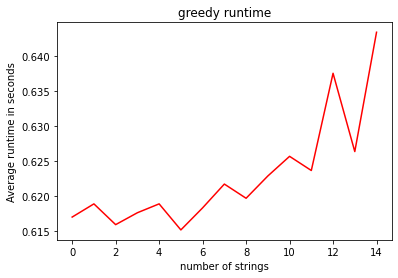

In [105]:
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



def greedy_experiment(base, f, t):
    greedy_times = []
    len_lcs_matrix = np.zeros((f, f))
    Set_Strings = strings_maker(f)



    for i in range(f): 
        runtime = 0
        for j in range(f):
            greedy_start = timeit.default_timer()

      

            exp_matrix_builder(Set_Strings,len_lcs_matrix,f)


            greedy_stop = timeit.default_timer() 


            greedy_time = greedy_stop - greedy_start
            runtime += greedy_time 
        greedy_times.append((runtime/t))
      


    
    plt.plot((range(0,f,1)), greedy_times, color="red")
    plt.title('greedy runtime') 
    plt.xlabel('number of strings') 
    plt.ylabel('Average runtime in seconds') 
    plt.show()



base_str = "GCTAGCACATAGCCGCTAGCACATAGCCGCTAGCACATAGCC"

greedy_experiment(base_str, 15, 5)



In [94]:
def exp_distances(Set_Strings):
    #getting the distances between each two genes by looping through all of them
    vals = []
    for i in Set_Strings:
        for j in Set_Strings:
            #if the two genes are the same, don't calculate distance
            if [i][0] == [j][0]:
                pass
            #if the two genes are different, calculate distance
            else:
                vals.append([retrieve_name(i),retrieve_name(j),editDistDP(i, j, len(i), len(j))])
    return vals

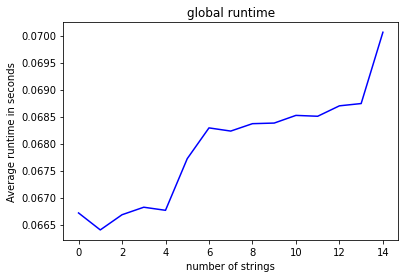

In [115]:
import timeit
import matplotlib.pyplot as plt


      

def greedy_experiment(base, f, t):
    global_times = []
    Set_Strings = strings_maker(f)



    for i in range(f): 
        runtime = 0
        for j in range(f):
            global_start = timeit.default_timer()

      

            exp_distances(Set_Strings)


            global_stop = timeit.default_timer() 


            global_time = global_stop - global_start
            runtime += global_time 
        global_times.append((runtime/t))
      


    
    plt.plot((range(0,f,1)), global_times, color="blue")
    plt.title('global runtime') 
    plt.xlabel('number of strings') 
    plt.ylabel('Average runtime in seconds') 
    plt.show()



base_str = "GCTAGCACATAGCCGCTAGCACATAGCCGCTAGCACATAGCC"

greedy_experiment(base_str, 15, 5)



In [116]:
import numpy as np

def nw(x, y, match = 1, mismatch = 1, gap = 1):
    """
    A function that alligns two strings and shows the differences 
    as dashes and unmatching characters in the allignment
    
    """
    nx = len(x)
    ny = len(y)
    # Optimal score at each possible pair of characters.
    F = np.zeros((nx + 1, ny + 1))
    F[:,0] = np.linspace(0, -nx * gap, nx + 1)
    F[0,:] = np.linspace(0, -ny * gap, ny + 1)
    # Pointers to trace through an optimal aligment.
    P = np.zeros((nx + 1, ny + 1))
    P[:,0] = 3
    P[0,:] = 4
    # Temporary scores.
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            tmax = np.max(t)
            F[i+1,j+1] = tmax
            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4
    # Trace through an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1
    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    two_alligned = [str(rx), str(ry)]
    return two_alligned



In [117]:
def alignments_generator(parental_relationships):
    
    """
    A function that generates allignments between each parent and child
    
    """


    alligned_strings = []
    for i in parental_relationships:
        alligned_strings.append(nw(i[0], i[1]))
    return alligned_strings

In [118]:
def operations_pc(parent, child):
    
    """
    A function that counts the number of each operation for 
    each pair of parent and child
    
    """
    deletions = 0
    insertions = 0
    mutations = 0
    
    for i in range(len(parent)):
        #if parent has - and child has a character in the same place, insertion
        if parent[i] == '-' and child[i] != '-':
            insertions += 1
        #if parent has a character and child has - in the same place, deletion
        elif parent[i] != '-' and child[i] == '-':
            deletions += 1
        #if parent has a character different than the child, mutation
        elif parent[i] != '-' and child[i] != '-' and parent[i] != child[i]:
            mutations += 1

    operations = (f"deletions:{deletions} insertions: {insertions} mutations: {mutations}")
    
    return [deletions, insertions, mutations]

In [121]:
def numbers_of_operations(parental_relationships):
    
    """
    A function that gets the number of each operation for 
    all pairs of parents and children
    
    """

    parent_child_allignments = alignments_generator(parental_relationships)

    dim = []

    for i in parent_child_allignments:
        dim.append(operations_pc(i[0], i[1]))

    return dim


parental_relationships = [[a,d],[a,e],[d,b],[d,g],[e,c],[e,f]]
numbers_of_operations(parental_relationships)

[[3, 7, 4], [6, 7, 7], [2, 6, 6], [2, 9, 3], [4, 8, 2], [3, 9, 2]]

In [120]:
def calculator(parental_relationships):
    
    """
    A function that calculates the probability of deletion, insertion, and mutation 
    for each character in the parent string to form the child string
    
    """

  
    dim = numbers_of_operations(parental_relationships)
  

    parents = []
    #separating the parents
    for i in parental_relationships:
        parents.append(i[0])
  

    p_order = 0
    deletion_probability = 0 
    insertion_probability = 0
    mutations_probability = 0
    
    #calculating the probability for each pair of parent-child
    for j in dim:
        deletion_probability += j[0] / len(parents[p_order])
        insertion_probability += j[1] / len(parents[p_order])
        mutations_probability += j[2] / len(parents[p_order])
        p_order += 1
    
    #averaging all probabilities by number of relationships to get a final probability
    final_deletion_probability =  deletion_probability / len(parental_relationships)
    final_insertion_probability = insertion_probability / len(parental_relationships)
    final_mutations_probability =  mutations_probability / len(parental_relationships)


    return final_deletion_probability, final_insertion_probability, final_mutations_probability



parental_relationships = [[a,d],[a,e],[d,b],[d,g],[e,c],[e,f]]

print(calculator(parental_relationships))

(0.041089800117577895, 0.09390799529688416, 0.04900426219870665)
